# Electron Tag and Probe using the Z boson

- Repository: https://github.com/ku-cms/LeptonStudies
- CERN SWAN platform: https://swan.cern.ch/
- CERN SWAN info: https://swan.web.cern.ch/swan/
- NANO AOD documentation page: https://cms-nanoaod-integration.web.cern.ch/autoDoc/
- CMS Data Aggregation System (DAS): https://cmsweb.cern.ch/das/

In [1]:
# import libraries
import uproot
from glob import glob
import awkward as ak
import numpy as np
from coffea.nanoevents import NanoEventsFactory

# plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep

# set up mplhep
mplhep.style.use(mplhep.style.CMS)

In [2]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

In [3]:
# Load dataset files

# Important:
# To load datasets, set the "base_directory" path based on the computing cluster (SWAN or Purdue).

# SWAN
base_directory = "/eos/user/c/cmsdas/2024/short-ex-egm/datasets/"

# Purdue
#base_directory = "/work/projects/hats2024/egamma/datasets/"

# DY
dyfiles = sorted(
    glob(
        f"{base_directory}DYto2L-2Jets_MLL-50_TuneCP5_13p6TeV-amcatnloFXFX-pythia8/*.root"
    )
)

# Data (EGamma trigger)
datafiles = sorted(glob(f"{base_directory}EGamma1_Run2023C/*.root"))

# Print number of files for each dataset
print("Number of DY files: {0}".format(len(dyfiles)))
print("Number of Data (EGamma trigger) files: {0}".format(len(datafiles)))

file = uproot.open(dyfiles[0])
print("Example file info:")
dict(file)

Number of DY files: 4
Number of Data (EGamma trigger) files: 4
Example file info:


{'tag;1': <TObjString 'untagged' at 0x7f190d2d4dd0>,
 'Events;1': <TTree 'Events' (1782 branches) at 0x7f190d26f790>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (6 branches) at 0x7f19b86362e0>,
 'Runs;1': <TTree 'Runs' (10 branches) at 0x7f19b8636430>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7f18c41714c0>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7f19b8636df0>}

In [4]:
# Create NanoEventsFactory objects
dyevents = NanoEventsFactory.from_root(dyfiles[0]).events()
dataevents = NanoEventsFactory.from_root(datafiles[0]).events()

In [5]:
# Print:
# - number of events
# - number of electrons
# - number of muons

# variables
n_events    = 0
n_electrons = 0
n_muons     = 0

# DY

# method 1
n_events    = len(dyevents.run)
n_electrons = len(ak.flatten(dyevents.Electron))
n_muons     = len(ak.flatten(dyevents.Muon))

# method 2
#n_events    = ak.num(dyevents.run, axis=0)
#n_electrons = sum(ak.num(dyevents.Electron, axis=1))
#n_muons     = sum(ak.num(dyevents.Muon, axis=1))

# per event (on average)
n_electrons_per_event = n_electrons / n_events
n_muons_per_event     = n_muons / n_events

print("Sample: DY, 2023")
print(" - Number of events: {0}".format(n_events))
print(" - Number of electrons: total = {0}, per event (avg.) = {1:.2f}".format(n_electrons, n_electrons_per_event))
print(" - Number of muons: total = {0}, per event (avg.) = {1:.2f}".format(n_muons, n_muons_per_event))

# Data

# method 1
n_events    = len(dataevents.run)
n_electrons = len(ak.flatten(dataevents.Electron))
n_muons     = len(ak.flatten(dataevents.Muon))

# method 2
#n_events    = ak.num(dataevents.run, axis=0)
#n_electrons = sum(ak.num(dataevents.Electron, axis=1))
#n_muons     = sum(ak.num(dataevents.Muon, axis=1))

# per event (on average)
n_electrons_per_event = n_electrons / n_events
n_muons_per_event     = n_muons / n_events

print("Sample: Data (EGamma trigger), 2023")
print(" - Number of events: {0}".format(n_events))
print(" - Number of electrons: total = {0}, per event (avg.) = {1:.2f}".format(n_electrons, n_electrons_per_event))
print(" - Number of muons: total = {0}, per event (avg.) = {1:.2f}".format(n_muons, n_muons_per_event))

#dyevents.Electron.fields
#dataevents.Electron.fields

Sample: DY, 2023
 - Number of events: 864039
 - Number of electrons: total = 587200, per event (avg.) = 0.68
 - Number of muons: total = 610675, per event (avg.) = 0.71
Sample: Data (EGamma trigger), 2023
 - Number of events: 1520620
 - Number of electrons: total = 1559364, per event (avg.) = 1.03
 - Number of muons: total = 467540, per event (avg.) = 0.31


(array([    0.,     0.,     0.,     0.,     0., 34074., 24554., 19037.,
        15490., 13321., 11998., 11170., 10120.,  9765.,  9413.,  9270.,
         8980.,  8993.,  9219.,  9115.,  9229.,  9324.,  9612.,  9553.,
         9730.,  9804.,  9879., 10051., 10288., 10366., 10467., 10860.,
        10899., 10898., 10972., 11143., 11422., 11459., 11661., 11712.,
        12001., 11871., 11903., 11573., 10915., 10224.,  8993.,  8112.,
         6805.,  5974.,  5244.,  4711.,  4119.,  3735.,  3426.,  3091.,
         2755.,  2582.,  2375.,  2264.,  2144.,  1926.,  1803.,  1725.,
         1694.,  1564.,  1457.,  1302.,  1242.,  1178.,  1177.,  1054.,
          985.,   943.,   916.,   843.,   828.,   761.,   682.,   626.,
          654.,   602.,   574.,   562.,   518.,   489.,   473.,   437.,
          407.,   389.,   390.,   359.,   364.,   357.,   337.,   325.,
          300.,   255.,   283.,   265.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12., 

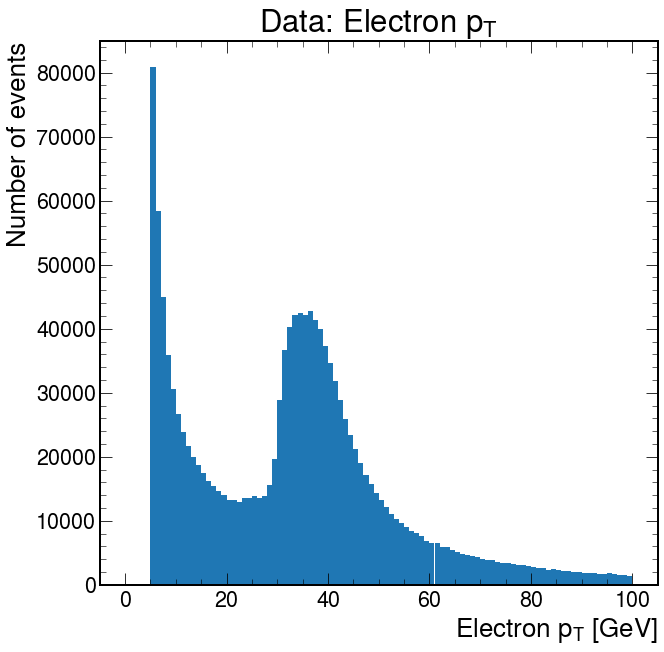

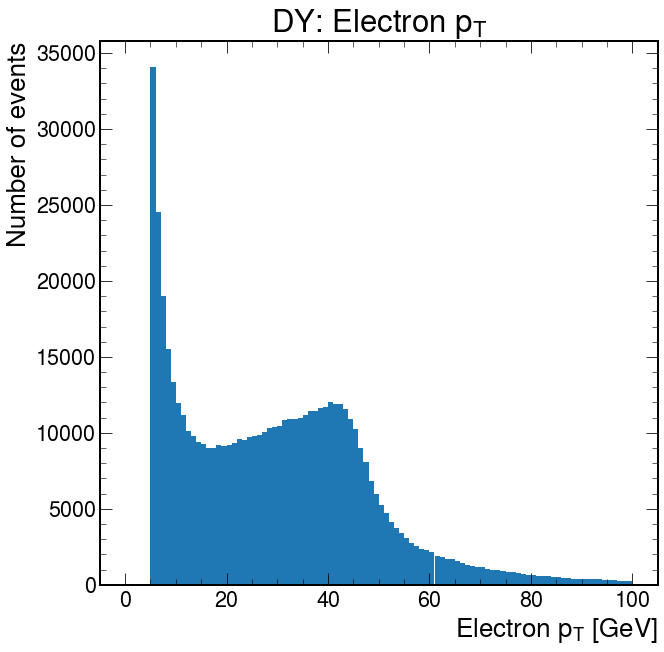

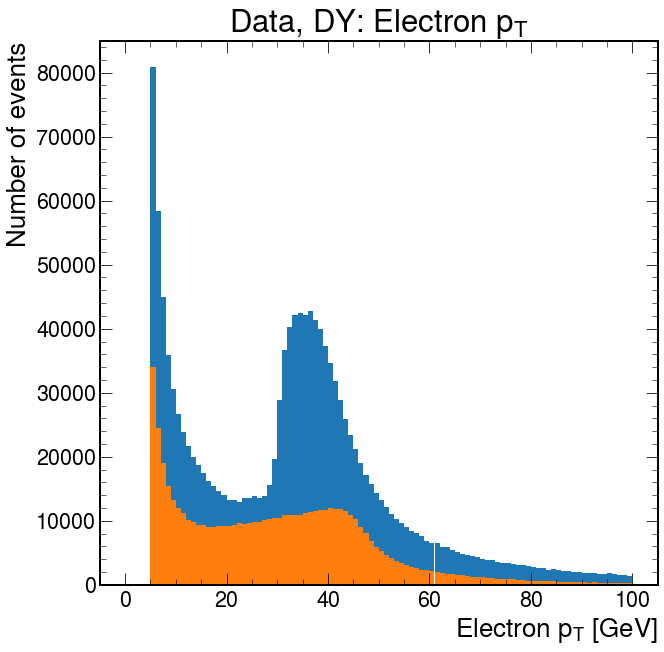

In [6]:
# Electron pT

# Data
fig, ax = plt.subplots()
ax.set_title(r"Data: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(dataevents.Electron.pt), bins=np.linspace(0, 100, 101))

# DY
fig, ax = plt.subplots()
ax.set_title(r"DY: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(dyevents.Electron.pt), bins=np.linspace(0, 100, 101))

# Data, DY
fig, ax = plt.subplots()
ax.set_title(r"Data, DY: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(dataevents.Electron.pt), bins=np.linspace(0, 100, 101))
ax.hist(ak.flatten(dyevents.Electron.pt), bins=np.linspace(0, 100, 101))

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


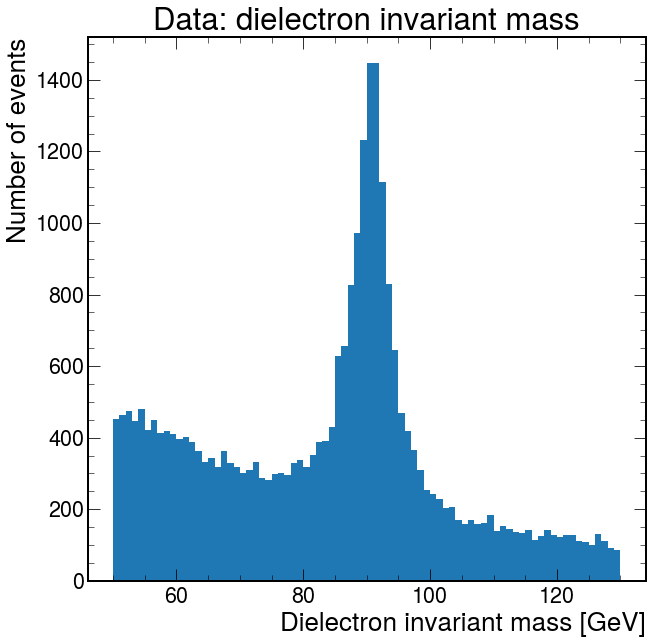

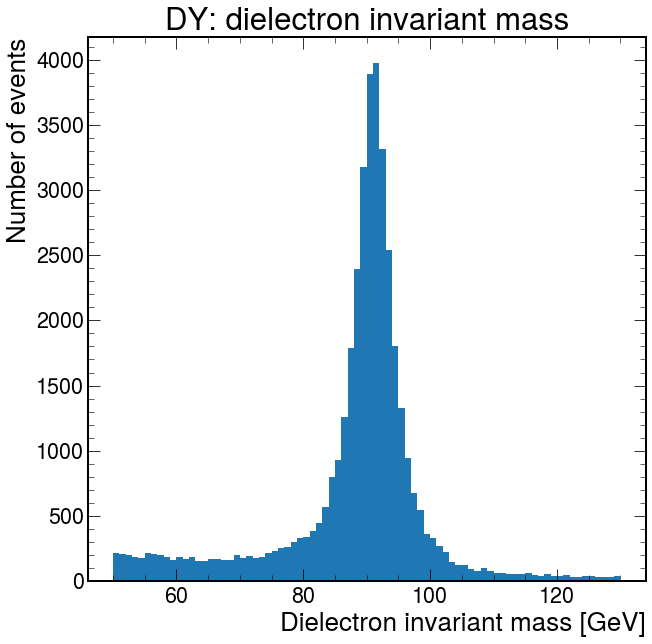

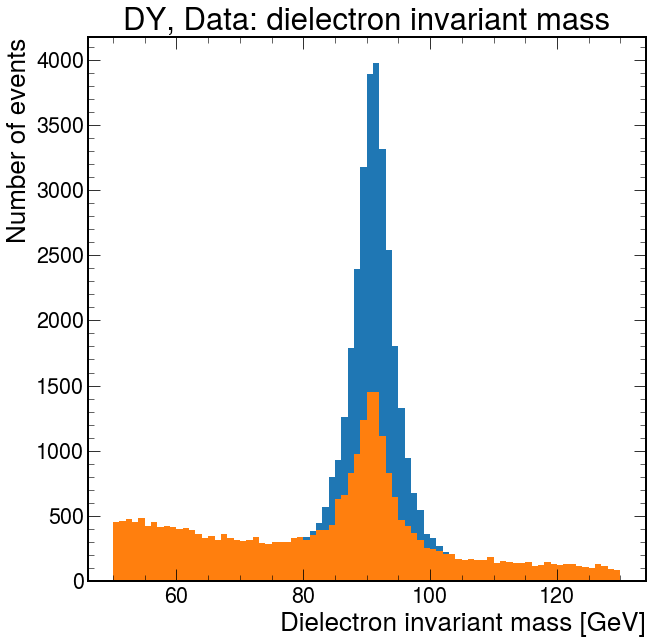

In [7]:
# electrons: dielectron mass

# Data
fig, ax = plt.subplots()
ax.set_title(r"Data: dielectron invariant mass")
ax.set_xlabel(r"Dielectron invariant mass [GeV]")
ax.set_ylabel(r"Number of events")
event_cut = ak.all(dataevents.Electron.r9 > 0.96, axis=1)
#ee = ak.combinations(dataevents.Electron, 2, fields = ["e0", "e1"])
ee = ak.combinations(dataevents[event_cut].Electron, 2, fields=["e0", "e1"])
mass = (ee.e0 + ee.e1).mass
ax.hist(ak.flatten(mass), bins=np.linspace(50, 130, 81));

# DY
fig, ax = plt.subplots()
ax.set_title(r"DY: dielectron invariant mass")
ax.set_xlabel(r"Dielectron invariant mass [GeV]")
ax.set_ylabel(r"Number of events")
event_cut = ak.all(dyevents.Electron.r9 > 0.96, axis=1)
#ee = ak.combinations(dyevents.Electron, 2, fields = ["e0", "e1"])
ee = ak.combinations(dyevents[event_cut].Electron, 2, fields=["e0", "e1"])
mass = (ee.e0 + ee.e1).mass
ax.hist(ak.flatten(mass), bins=np.linspace(50, 130, 81));

# DY, Data
fig, ax = plt.subplots()
ax.set_title(r"DY, Data: dielectron invariant mass")
ax.set_xlabel(r"Dielectron invariant mass [GeV]")
ax.set_ylabel(r"Number of events")
# Data
data_event_cut = ak.all(dataevents.Electron.r9 > 0.96, axis=1)
data_ee        = ak.combinations(dataevents[data_event_cut].Electron, 2, fields=["e0", "e1"])
data_mass      = (data_ee.e0 + data_ee.e1).mass
# DY
dy_event_cut = ak.all(dyevents.Electron.r9 > 0.96, axis=1)
dy_ee        = ak.combinations(dyevents[dy_event_cut].Electron, 2, fields=["e0", "e1"])
dy_mass      = (dy_ee.e0 + dy_ee.e1).mass
# Combined plot
ax.hist(ak.flatten(dy_mass), bins=np.linspace(50, 130, 81));
ax.hist(ak.flatten(data_mass), bins=np.linspace(50, 130, 81));